## Import Package

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV   
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from numpy import mean


## Import Data

In [3]:
df = pd.read_spss('Data.sav')

In [4]:
df

,r301,r102,Y,r1608,r1609,r1611a,r1618a,r1619,r1610a
0,3.0,1.0,2.0,1.0,2.0,10.0,1.0,7.0,1.0
1,2.0,1.0,2.0,1.0,6.0,10.0,1.0,7.0,1.0
2,7.0,1.0,2.0,1.0,2.0,2.0,1.0,7.0,1.0
3,8.0,1.0,2.0,1.0,6.0,10.0,1.0,7.0,1.0
4,3.0,1.0,2.0,1.0,2.0,3.0,1.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...
3976,1.0,71.0,2.0,1.0,6.0,2.0,1.0,0.0,1.0
3977,3.0,71.0,2.0,1.0,4.0,2.0,1.0,7.0,1.0
3978,4.0,71.0,2.0,1.0,6.0,2.0,1.0,7.0,1.0
3979,2.0,71.0,2.0,3.0,5.0,2.0,1.0,7.0,1.0


## Preprosessing

### Cek Missing Value

In [5]:
df.isnull().sum()

r301      0
r102      0
Y         0
r1608     0
r1609     0
r1611a    0
r1618a    0
r1619     0
r1610a    0
dtype: int64

## Exploratory Data  Analysis

In [6]:
df.Y.value_counts()

2.0    3173
1.0     808
Name: Y, dtype: int64

[]

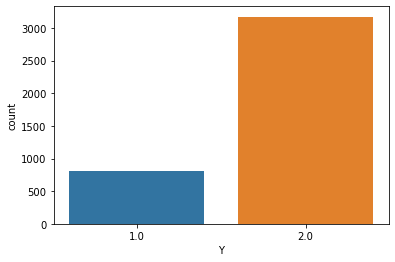

In [7]:
sns.countplot(x='Y', data=df)
plt.plot()

#### Note : 1 : Menerima Kartu KPS , 2: Tidak  Menerima Kartu KPS

In [8]:
df

,r301,r102,Y,r1608,r1609,r1611a,r1618a,r1619,r1610a
0,3.0,1.0,2.0,1.0,2.0,10.0,1.0,7.0,1.0
1,2.0,1.0,2.0,1.0,6.0,10.0,1.0,7.0,1.0
2,7.0,1.0,2.0,1.0,2.0,2.0,1.0,7.0,1.0
3,8.0,1.0,2.0,1.0,6.0,10.0,1.0,7.0,1.0
4,3.0,1.0,2.0,1.0,2.0,3.0,1.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...
3976,1.0,71.0,2.0,1.0,6.0,2.0,1.0,0.0,1.0
3977,3.0,71.0,2.0,1.0,4.0,2.0,1.0,7.0,1.0
3978,4.0,71.0,2.0,1.0,6.0,2.0,1.0,7.0,1.0
3979,2.0,71.0,2.0,3.0,5.0,2.0,1.0,7.0,1.0


In [9]:
df.columns[3:9]

Index(['r1608', 'r1609', 'r1611a', 'r1618a', 'r1619', 'r1610a'], dtype='object')

####  Pemeriksaan sebaran nilai data pada tiap atribut/variabel untuk masing-masing kelas dengan box-plot


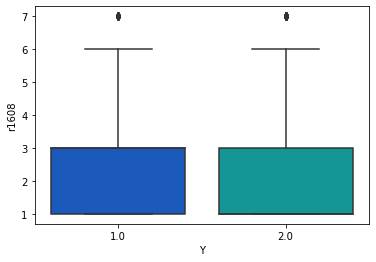

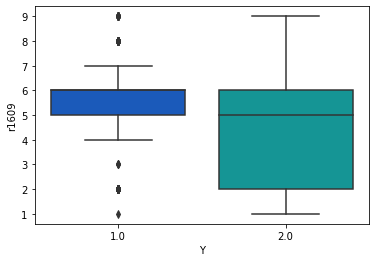

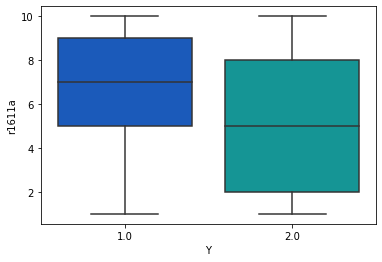

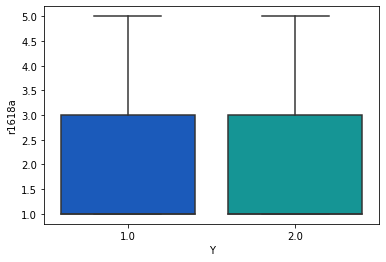

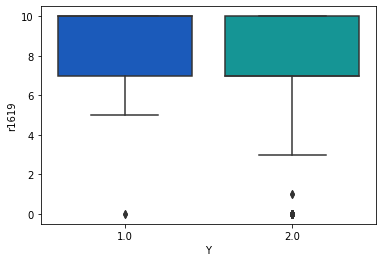

<Figure size 432x288 with 0 Axes>

In [10]:
l=list(df.columns[3:11])
for i in range(len(l)-1):
    sns.boxplot(x='Y',y=l[i], data=df, palette='winter')
    plt.figure()

In [11]:
df

,r301,r102,Y,r1608,r1609,r1611a,r1618a,r1619,r1610a
0,3.0,1.0,2.0,1.0,2.0,10.0,1.0,7.0,1.0
1,2.0,1.0,2.0,1.0,6.0,10.0,1.0,7.0,1.0
2,7.0,1.0,2.0,1.0,2.0,2.0,1.0,7.0,1.0
3,8.0,1.0,2.0,1.0,6.0,10.0,1.0,7.0,1.0
4,3.0,1.0,2.0,1.0,2.0,3.0,1.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...
3976,1.0,71.0,2.0,1.0,6.0,2.0,1.0,0.0,1.0
3977,3.0,71.0,2.0,1.0,4.0,2.0,1.0,7.0,1.0
3978,4.0,71.0,2.0,1.0,6.0,2.0,1.0,7.0,1.0
3979,2.0,71.0,2.0,3.0,5.0,2.0,1.0,7.0,1.0


In [12]:
data_cor =df[[ 'r1608', 'r1609','r1611a','r1618a','r1619','r1610a']]

In [13]:
correlation =data_cor.corr()

In [14]:
correlation

,r1608,r1609,r1611a,r1618a,r1619,r1610a
r1608,1.000000,0.337644,0.256843,0.341563,0.299240,0.332820
r1609,0.337644,1.000000,0.294694,0.248501,0.339211,0.268127
r1611a,0.256843,0.294694,1.000000,0.396914,0.517281,0.323719
r1618a,0.341563,0.248501,0.396914,1.000000,0.508428,0.467680
r1619,0.299240,0.339211,0.517281,0.508428,1.000000,0.402663
r1610a,0.332820,0.268127,0.323719,0.467680,0.402663,1.000000


<AxesSubplot:>

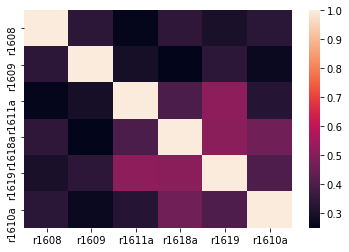

In [15]:
sns.heatmap(correlation)


## Split data

In [16]:
df.iloc[ :  ,3:10]

,r1608,r1609,r1611a,r1618a,r1619,r1610a
0,1.0,2.0,10.0,1.0,7.0,1.0
1,1.0,6.0,10.0,1.0,7.0,1.0
2,1.0,2.0,2.0,1.0,7.0,1.0
3,1.0,6.0,10.0,1.0,7.0,1.0
4,1.0,2.0,3.0,1.0,7.0,1.0
...,...,...,...,...,...,...
3976,1.0,6.0,2.0,1.0,0.0,1.0
3977,1.0,4.0,2.0,1.0,7.0,1.0
3978,1.0,6.0,2.0,1.0,7.0,1.0
3979,3.0,5.0,2.0,1.0,7.0,1.0


In [17]:
x = df.iloc[ :  ,3:9]
y = df.iloc[: , 2]

In [18]:
y

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
3976    2.0
3977    2.0
3978    2.0
3979    2.0
3980    1.0
Name: Y, Length: 3981, dtype: float64

In [19]:
x

,r1608,r1609,r1611a,r1618a,r1619,r1610a
0,1.0,2.0,10.0,1.0,7.0,1.0
1,1.0,6.0,10.0,1.0,7.0,1.0
2,1.0,2.0,2.0,1.0,7.0,1.0
3,1.0,6.0,10.0,1.0,7.0,1.0
4,1.0,2.0,3.0,1.0,7.0,1.0
...,...,...,...,...,...,...
3976,1.0,6.0,2.0,1.0,0.0,1.0
3977,1.0,4.0,2.0,1.0,7.0,1.0
3978,1.0,6.0,2.0,1.0,7.0,1.0
3979,3.0,5.0,2.0,1.0,7.0,1.0


## Pembentukan Model

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 8)

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", y_test.shape)

X_train shape:  (2786, 6)
Y_train shape:  (2786,)
X_test shape:  (1195, 6)
Y_test shape:  (1195,)


In [21]:
# summarize class distribution
print("Before oversampling: ",Counter(y_train))


Before oversampling:  Counter({2.0: 2235, 1.0: 551})


### Oversampling

In [22]:
#define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

After oversampling:  Counter({2.0: 2235, 1.0: 2235})


### SVM

In [23]:
from sklearn.svm import SVC

svc = SVC()

In [24]:
svc.fit(X_train_SMOTE, y_train_SMOTE)

SVC()

In [25]:
y_pred_svc = svc.predict(X_test)
y_pred_svc

array([1., 1., 1., ..., 1., 1., 1.])

In [26]:
from sklearn.metrics import confusion_matrix  
confusion_matrix(y_test, y_pred_svc)

array([[206,  51],
       [489, 449]], dtype=int64)

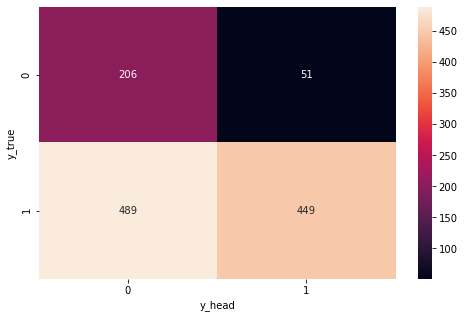

In [27]:
import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [28]:
from sklearn.metrics import classification_report  
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

         1.0       0.30      0.80      0.43       257
         2.0       0.90      0.48      0.62       938

    accuracy                           0.55      1195
   macro avg       0.60      0.64      0.53      1195
weighted avg       0.77      0.55      0.58      1195



In [29]:
from sklearn import metrics
#accuracy
print("acuracy:", metrics.accuracy_score(y_test,y_pred_svc))

acuracy: 0.5481171548117155


#### Hyperparameter Tuning SVM

In [30]:
from sklearn.model_selection import GridSearchCV          # hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid_svc = GridSearchCV(svc, param_grid, refit=True, verbose=1)

grid_svc.fit(X_train_SMOTE, y_train_SMOTE)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=1)

In [31]:
grid_svc.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [32]:
# Membuat ulang model SVC

svc_new = SVC(C=100, gamma=1, kernel='rbf')

svc_new.fit(X_train_SMOTE, y_train_SMOTE)

y_pred_svc_new = svc_new.predict(X_test)

In [33]:
print(classification_report(y_test, y_pred_svc_new))

              precision    recall  f1-score   support

         1.0       0.39      0.45      0.42       257
         2.0       0.84      0.81      0.82       938

    accuracy                           0.73      1195
   macro avg       0.61      0.63      0.62      1195
weighted avg       0.74      0.73      0.74      1195



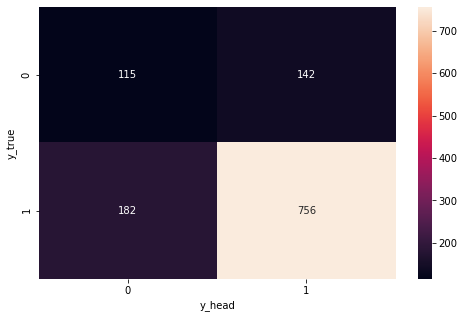

In [55]:
import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_svc_new), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [35]:
from sklearn import metrics
#accuracy
print("acuracy:", metrics.accuracy_score(y_test,y_pred_svc_new))

acuracy: 0.7288702928870293


### Gradient Boosting

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

In [42]:
gbc.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_gbc = gbc.predict(X_test)

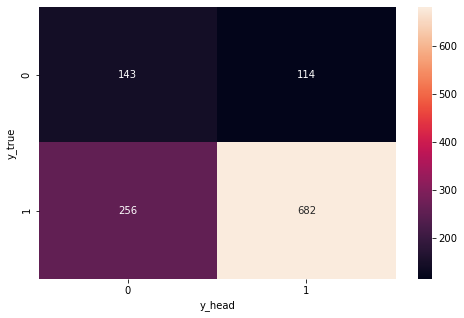

In [43]:
import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_gbc), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [44]:
from sklearn import metrics
#accuracy
print("acuracy:", metrics.accuracy_score(y_test,y_pred_gbc))

acuracy: 0.6903765690376569


In [45]:
from sklearn.metrics import classification_report  
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

         1.0       0.36      0.56      0.44       257
         2.0       0.86      0.73      0.79       938

    accuracy                           0.69      1195
   macro avg       0.61      0.64      0.61      1195
weighted avg       0.75      0.69      0.71      1195



#### Hyperparameter Tuning

In [46]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [47]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(X_train_SMOTE,y_train_SMOTE)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [48]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [49]:
display(cv)

Best parameters are: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500}


0.659 + or -0.018 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.659 + or -0.018 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.66 + or -0.016 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.66 + or -0.014 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.689 + or -0.022 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.686 + or -0.022 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.704 + or -0.024 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.733 + or -0.034 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.696 + or -0.025 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.697 + or -0.023 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.752 + or -0.045 for the {'learning_rate': 0.01, 'max_dep

In [50]:
cv.best_params_

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500}

In [51]:
# Membuat ulang model GradientBoost

GBC_new = GradientBoostingClassifier(learning_rate=0.1,max_depth=9,n_estimators=500)

GBC_new.fit(X_train_SMOTE, y_train_SMOTE)

y_pred_GBC_new = GBC_new.predict(X_test)
y_train_predict = GBC_new.predict(X_train)

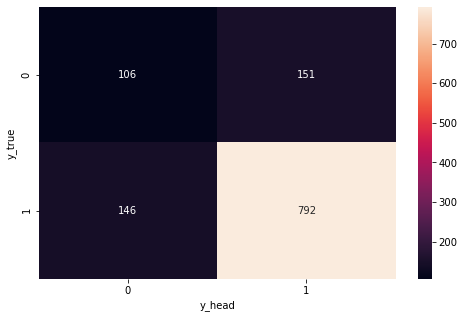

In [52]:
import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_GBC_new), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [53]:
from sklearn import metrics
#accuracy
print("acuracy:", metrics.accuracy_score(y_test,y_pred_GBC_new))

acuracy: 0.7514644351464436


In [54]:
from sklearn.metrics import classification_report  
print(classification_report(y_test, y_pred_GBC_new))

              precision    recall  f1-score   support

         1.0       0.42      0.41      0.42       257
         2.0       0.84      0.84      0.84       938

    accuracy                           0.75      1195
   macro avg       0.63      0.63      0.63      1195
weighted avg       0.75      0.75      0.75      1195

